### Урок 3. Классификация. Логистическая регрессия

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.
2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.
4. Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred.
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?

### Содержание
- [Подготовительная часть](Lesson-3.ipynb#Подготовительная-часть)
- [Практическое задание](Lesson-3.ipynb#Практическое-задание)

### Подготовительная часть

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [4]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [5]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [6]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [7]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [8]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [9]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [10]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [11]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [12]:
z = np.linspace(-10, 10, 101)

In [13]:
probabilities = sigmoid(z)

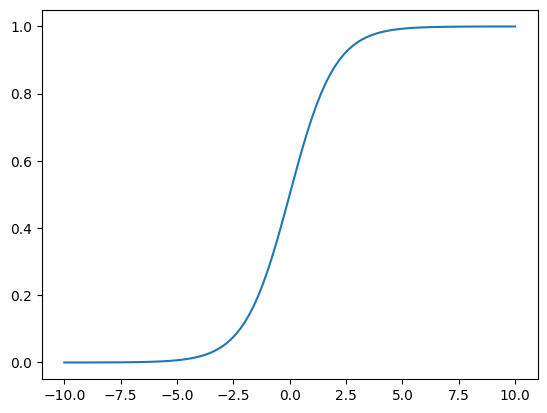

In [14]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [15]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [16]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-4)

500 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
1500 [ 0.44435675 -0.33951515  0.64152026  1.44406912] 0.8478360281905125
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.7651177745022372
2500 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105476
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442176
3500 [ 0.39088925 -0.53321212  0.63401986  1.36601535] 0.6097021563515639
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
4500 [ 0.37108342 -0.59102182  0.63446603  1.3413119 ] 0.5657147376221167
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.5532737788236779


### Практическое задание

#### Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.


Нули возможны в 2х случаях, когда предсказанное значение равно 0 или 1, для того чтобы исключить подобные ситуации можно как вариант добавить/отнять очень маленькое число

In [17]:
def calc_logloss(y, y_pred):
    small_num = 1e-8
    y_pred = np.where(y_pred==1, y_pred-small_num, y_pred)
    y_pred = np.where(y_pred==0, y_pred+small_num, y_pred)
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

y_pred = sigmoid(np.dot(W, X_st))
calc_logloss(y, y_pred)

0.5532531003505642

#### Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [18]:
# Немного изменим функцию eval_model чтоб она возвращала ещё и ошибку
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    y_pred = []
    err = float('inf')
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    err = calc_logloss(y, y_pred)
    return W, err

In [19]:
import itertools
def get_best_params(X, y, params):
    def _shuffle_params(variants):
        """
        Комбинирование возможных вариантов параметров обучения
        :param variants:
        :return:
        """
        return [{key: value for (key, value) in zip(params, values)}
                    for values in itertools.product(*params.values())]
    min_err = float('inf')
    best_params = []
    W = []
    combinations = _shuffle_params(params)
    for combination in combinations:
        W, current_err = eval_model(X, y, **combination)
        if current_err < min_err:
            min_err = current_err
            best_params = combination
    return min_err, W, best_params

error,W , best_params = get_best_params(X_st, y, {
    'alpha': np.logspace(0,-3, 10, dtype=np.float64),
    'iterations': np.logspace(2,5,10,dtype=np.int64)

})

print("Ошибка", error)
print("Веса", W)
print("Лучшие параметры", best_params)

Ошибка 0.04903843649846436
Веса [-2.51833218 -0.94525594  0.40029932  3.13243147]
Лучшие параметры {'alpha': 1.0, 'iterations': 100000}


#### Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.

In [20]:
def calc_pred_proba(W, X):
    pred_proba = sigmoid(np.dot(W, X))
    return pred_proba

In [21]:
print(calc_pred_proba(W, X_st))

[0.32666985 0.36396896 0.84161228 0.01187052 0.7863213  0.61529634
 0.92996086 0.15091739 0.31765652 0.8672267 ]


#### Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred.

In [24]:
def calc_pred(W, X):
    pred_proba = calc_pred_proba(W, X)
    return np.where(pred_proba > 0.5, 1, 0)
y_pred = calc_pred(W, X_st)
print(y_pred)

[0 0 1 0 1 1 1 0 0 1]


#### Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [23]:
# Подключим функции из sklearn для проверки результатов
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

In [25]:
def accuracy(y, y_pred):
    return np.mean(y==y_pred)

print(f'Accuracy: {accuracy(y, y_pred)}')

Accuracy: 0.8


In [26]:
print(f'Lib accuracy: {accuracy_score(y, y_pred)}')

Lib accuracy: 0.8


In [27]:
assert accuracy(y, y_pred) == accuracy_score(y, y_pred)

In [43]:
def my_confusion_matrix(y, y_pred):
    """
    Матрица ошибок
    ((True Positive, False Positive),(False Negative, True Negative))
    :param y:
    :param y_pred:
    :return:
    """
    result = np.zeros((2,2), dtype=np.int32)
    for p, r in zip(y_pred, y):
        result[p][r] += 1
    return result

y = y.astype(int)
my_confusion_matrix(y, y_pred)

array([[4, 1],
       [1, 4]], dtype=int32)

In [44]:
confusion_matrix(y,y_pred)

array([[4, 1],
       [1, 4]])

In [51]:
def precision(y, y_pred):
    """
    Точность
    TP/(TP+FP)
    :param y:
    :param y_pred:
    :return:
    """
    cm = my_confusion_matrix(y, y_pred)
    return cm[0,0]/(cm[0,0]+cm[0,1])

precision(y, y_pred)

0.8

In [52]:
precision_score(y, y_pred)

0.8

In [53]:
assert precision(y, y_pred) == precision_score(y, y_pred)

In [55]:
def recall(y, y_pred):
    """
    Чувствительность
    TP/(TP+FN)
    :param y:
    :param y_pred:
    :return:
    """
    cm = my_confusion_matrix(y, y_pred)
    return cm[0,0]/(cm[0,0]+cm[1,0])

recall(y, y_pred)

0.8

In [57]:
assert recall(y, y_pred) == recall_score(y, y_pred) # проверка

In [58]:
def f1_value(y, y_pred):
    """
    Гармоническое среднее чувствительности и точности
    (2*precision*recall)/(precision + recall)
    :param y:
    :param y_pred:
    :return:
    """
    precision_value = precision(y, y_pred)
    recall_value = recall(y, y_pred)
    return 2*precision_value*recall_value/(precision_value + recall_value)

f1_value(y, y_pred)

0.8000000000000002

In [61]:
assert f1_score(y, y_pred) == f1_value(y, y_pred)

Все результаты совпали с теми что расчитываются в sklearn

#### Могла ли модель переобучиться? Почему?

Могла.
В данном случае из-за маленькой выборки и большого количества итераций. Но и в принципе из за специфики логистической регрессии она склонна к переобучению